In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as col
import textwrap
from collections import Counter
from sklearn import preprocessing
import numpy as np
import math
from scipy.cluster.hierarchy import dendrogram, linkage
from  matplotlib.ticker import FuncFormatter
from met_brewer import palettes

In [2]:
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_yticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                      break_long_words=break_long_words))
    ax.set_yticklabels(labels, rotation=0)

In [3]:
df = pd.read_csv('./heatmap_cons.csv')
df = df.replace(['group_05', 'group_06', 'group_07', 'group_08', 'group_09', 'group_10', 'group_11', 'group_12', 
                'group_13', 'group_14', 'group_15', 'group_16', 'group_17', 'group_18', 'group_19', 'group_20', 
                'group_21', 'group_22', 'group_23', 'group_24', 'group_25', 'group_26', 'group_27', 'group_28', 
                'group_29', 'group_30', 'group_31', 'group_32'],
               ['marchands', 'boulangers', 'bouchers', 
                'tonneliers', 'drapiers', 'tanneurs', 
                'cabaretiers', 'maçons', 'forgerons', 
                'tailleurs', 'bateliers', 'pelletiers', 
                'charpentiers', 'crieurs et mesureurs de vin', 
                'cordonniers', 'orfèvres', 'marchands de grains', 
                'jardiniers', 'pêcheurs', 'barbiers et baigneurs', 
                'sauniers', 'tisserands', 'gourmets et courtiers', 
                'charrons', 'regrattiers, cordiers et fruitiers', 
                'coltineurs de tonneaux', 'constructeurs de bateaux', 
                'huiliers meuniers et tondeurs de draps'])
columns = df['date'].sort_values().unique()
index = df['represents'].sort_values().unique()
df2 = pd.DataFrame(index=index, columns=columns)
for element in index :
    sub_df = df.loc[df['represents'] == element]
    for index, row in sub_df.iterrows() :
        df2.loc[row['represents'], row['date']] = row['authority']

In [4]:
df_out = df2

In [5]:
for index, row in df2.iterrows():
    ls_count1 = []
    ls_count2 = []
    for element in df2.columns.to_list():
        to_count = df2.loc[index][element]
        
        if type(to_count) != str :
            df_out.loc[index][element] = 0
            
            
        else:
            
            if element <= 1452 :
                ls_count1.append(to_count)
                
            
            
            if element > 1452 :    
                ls_count2.append(to_count)
                
            decompte = Counter(ls_count1)
            decompte1 = Counter(ls_count2)
                
                
            df_out.loc[index][element] = decompte[to_count] + (decompte1[to_count] / 2)

In [6]:
df_out = df_out.reindex(["bateliers", "marchands", "bouchers", "cabaretiers", "drapiers", "marchands de grains",
               "sauniers", "orfèvres", "boulangers", "pelletiers", "tonneliers", "tanneurs", "gourmets et courtiers",
               "tailleurs", "forgerons", "cordonniers", "pêcheurs", "charrons",
               "jardiniers", "maçons", "barbiers et baigneurs", "tisserands", "regrattiers, cordiers et fruitiers",
               "charpentiers", "crieurs et mesureurs de vin", "coltineurs de tonneaux", "constructeurs de bateaux",
               "huiliers meuniers et tondeurs de draps"])

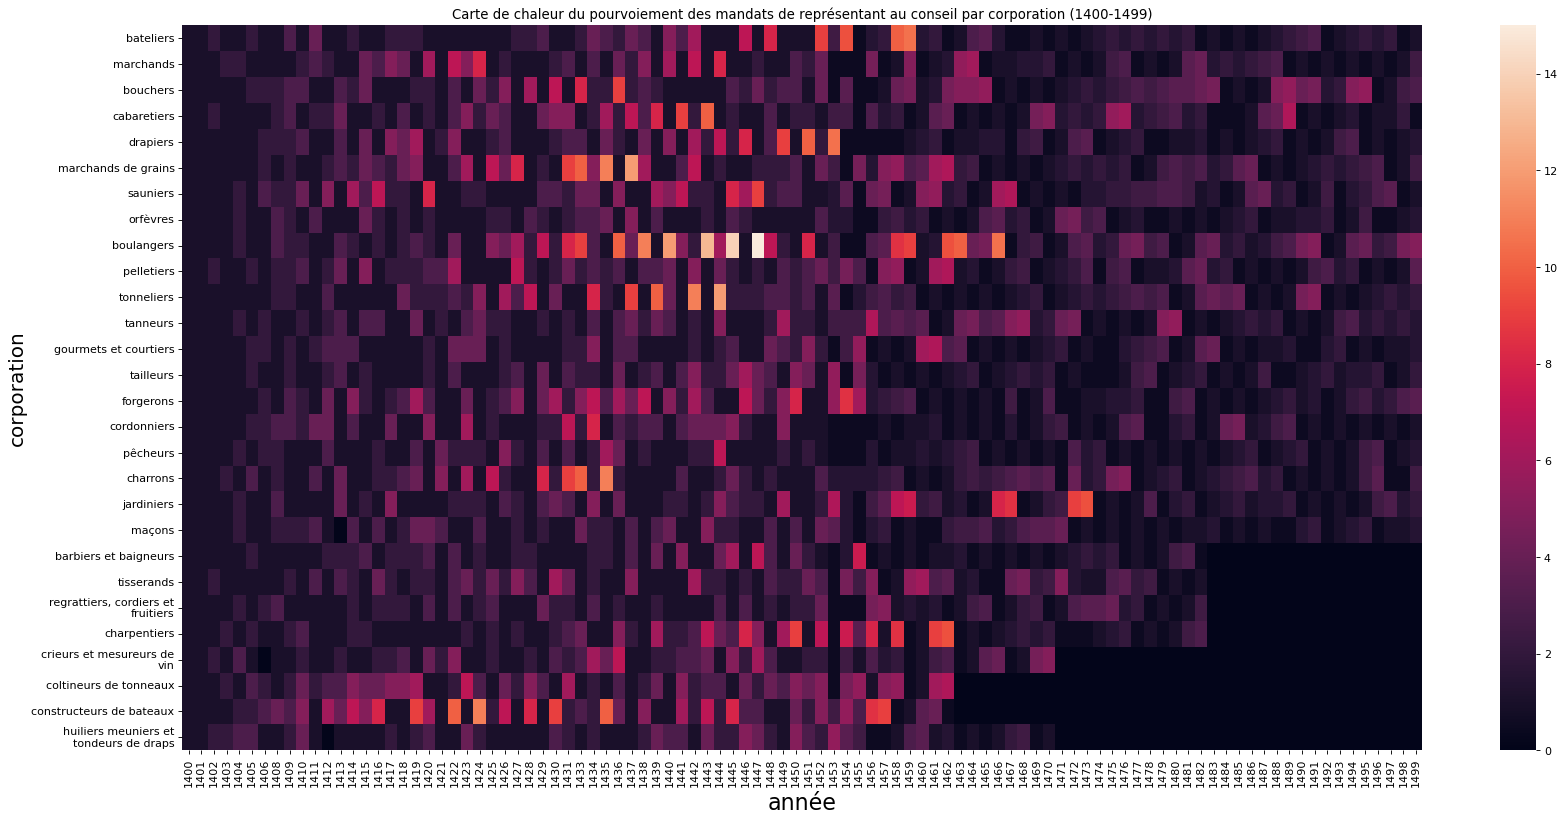

In [7]:
df_out_notnorm = df_out.astype(float)
plt.figure(figsize=(25, 12), dpi=80)
heat = sns.heatmap(df_out_notnorm)

heat.set_title("Carte de chaleur du pourvoiement des mandats de représentant au conseil par corporation (1400-1499)", loc='center')
heat.set_xlabel("année", fontsize = 20)
heat.set_ylabel("corporation", fontsize = 18)
wrap_labels(heat, 25)
fig = heat.get_figure()
#fig.savefig('./Images/heatmapXV.svg', format='svg',bbox_inches='tight')

In [8]:
x = df_out.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_out_norm = pd.DataFrame(x_scaled, index = df_out.index, columns = df_out.columns)

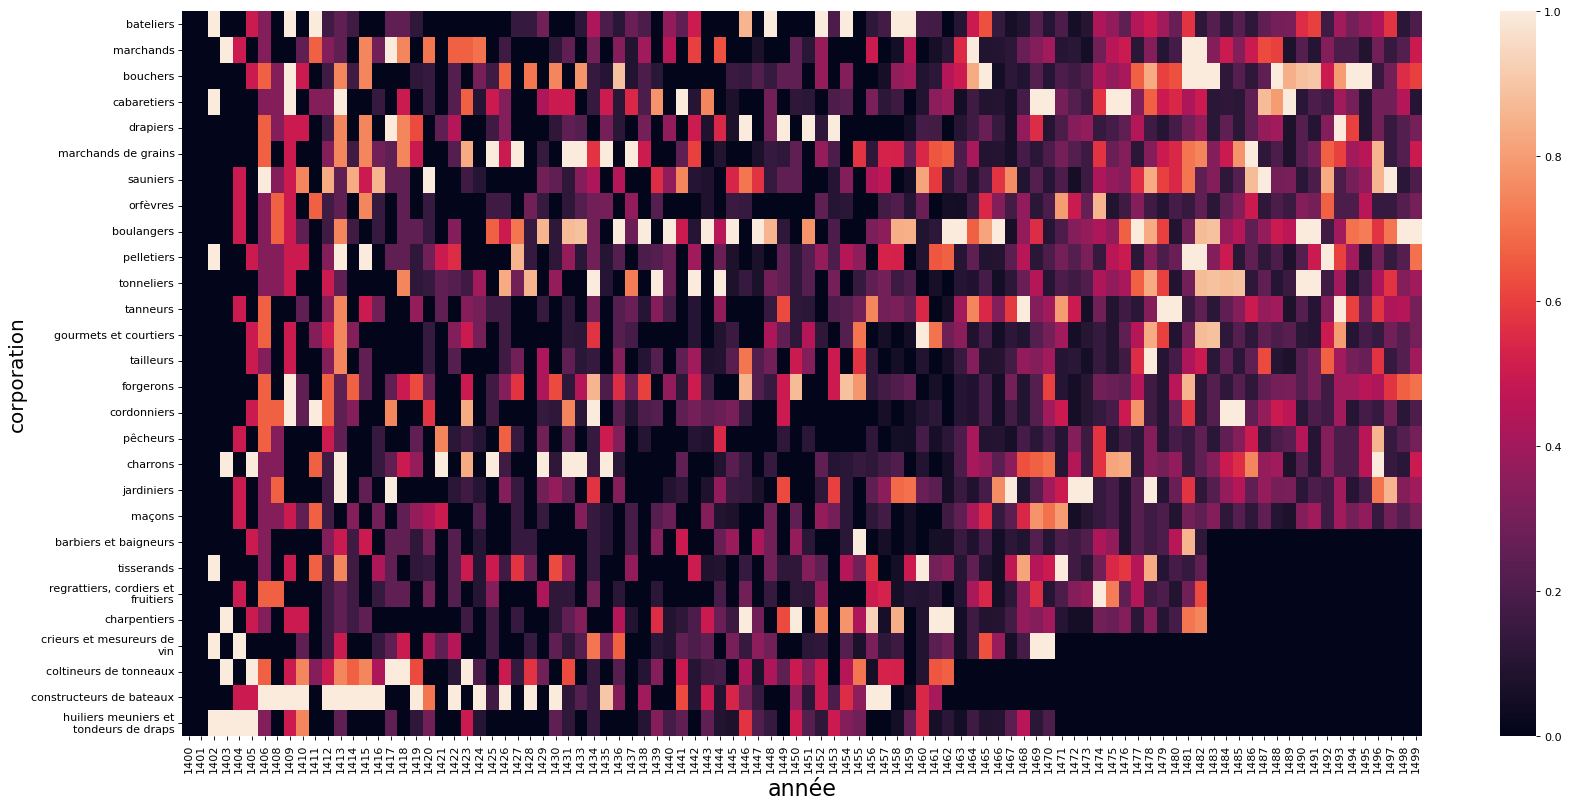

In [9]:
plt.figure(figsize=(25, 12), dpi=80)
heat = sns.heatmap(df_out_norm)

#heat.set_title("Carte de chaleur du pourvoiement des mandats de représentant au conseil par corporation (1400-1499)", loc='center')
heat.set_xlabel("année", fontsize = 20)
heat.set_ylabel("corporation", fontsize = 18)
wrap_labels(heat, 25)
fig = heat.get_figure()
fig.savefig('./Images/heatmapXV.svg', format='svg',bbox_inches='tight')

In [10]:
x = df_out.values
x_norm = preprocessing.normalize(x, norm = 'l2')
x_norm
df_out_norm = pd.DataFrame(x_norm, index = df_out.index, columns = df_out.columns)

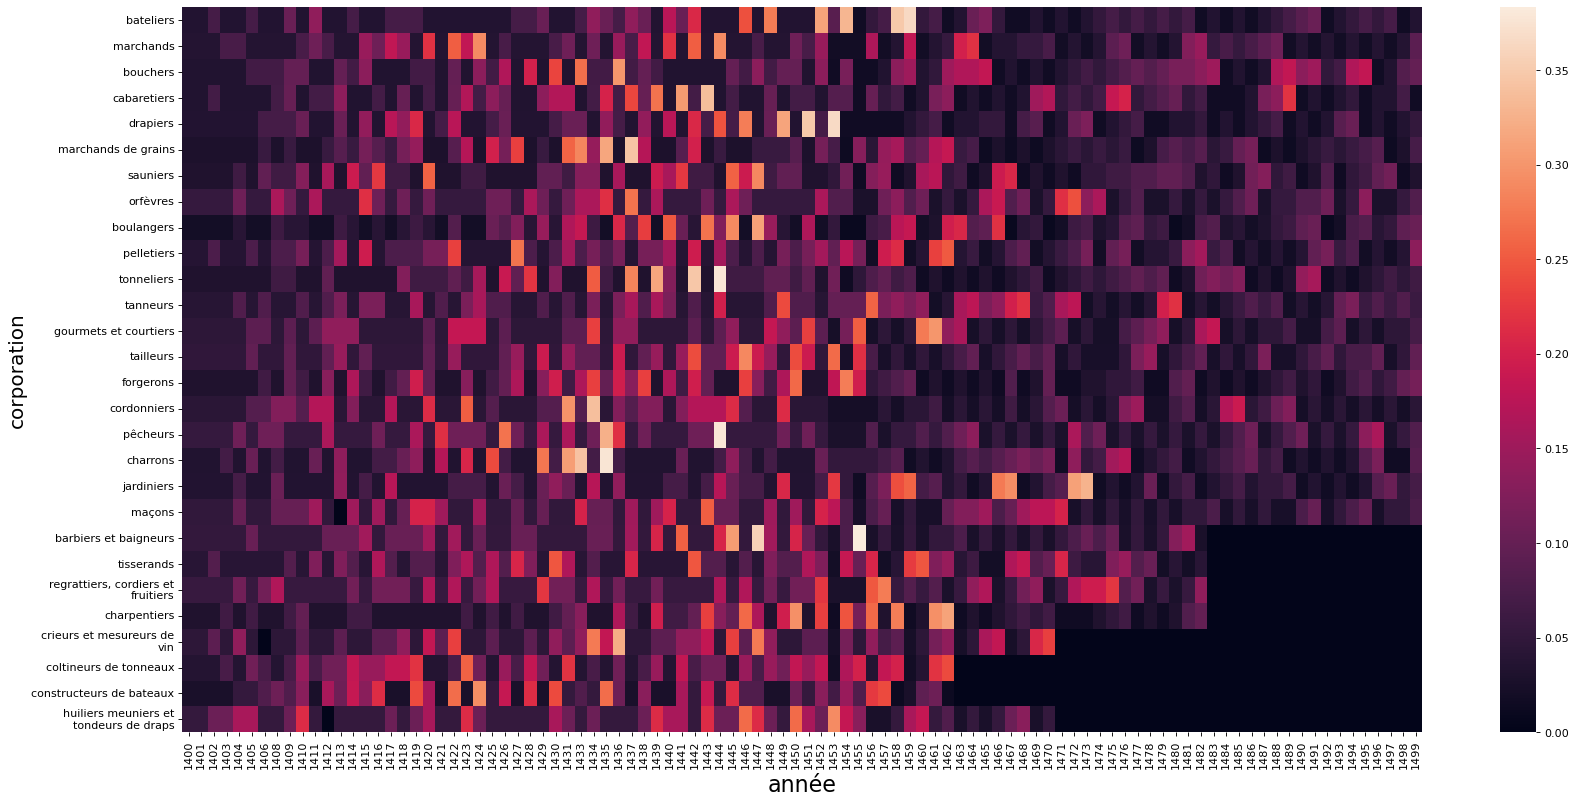

In [11]:
plt.figure(figsize=(25, 12), dpi=80)
heat = sns.heatmap(df_out_norm)

#heat.set_title("Carte de chaleur du pourvoiement des mandats de représentant au conseil par corporation (1400-1499)", loc='center')
heat.set_xlabel("année", fontsize = 20)
heat.set_ylabel("corporation", fontsize = 18)
wrap_labels(heat, 25)
fig = heat.get_figure()
#fig.savefig('./Images/heatmapXV.svg', format='svg',bbox_inches='tight')

In [12]:
x = df_out.values
min_max_scaler = preprocessing.StandardScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_out_norm = pd.DataFrame(x_scaled, index = df_out.index, columns = df_out.columns)

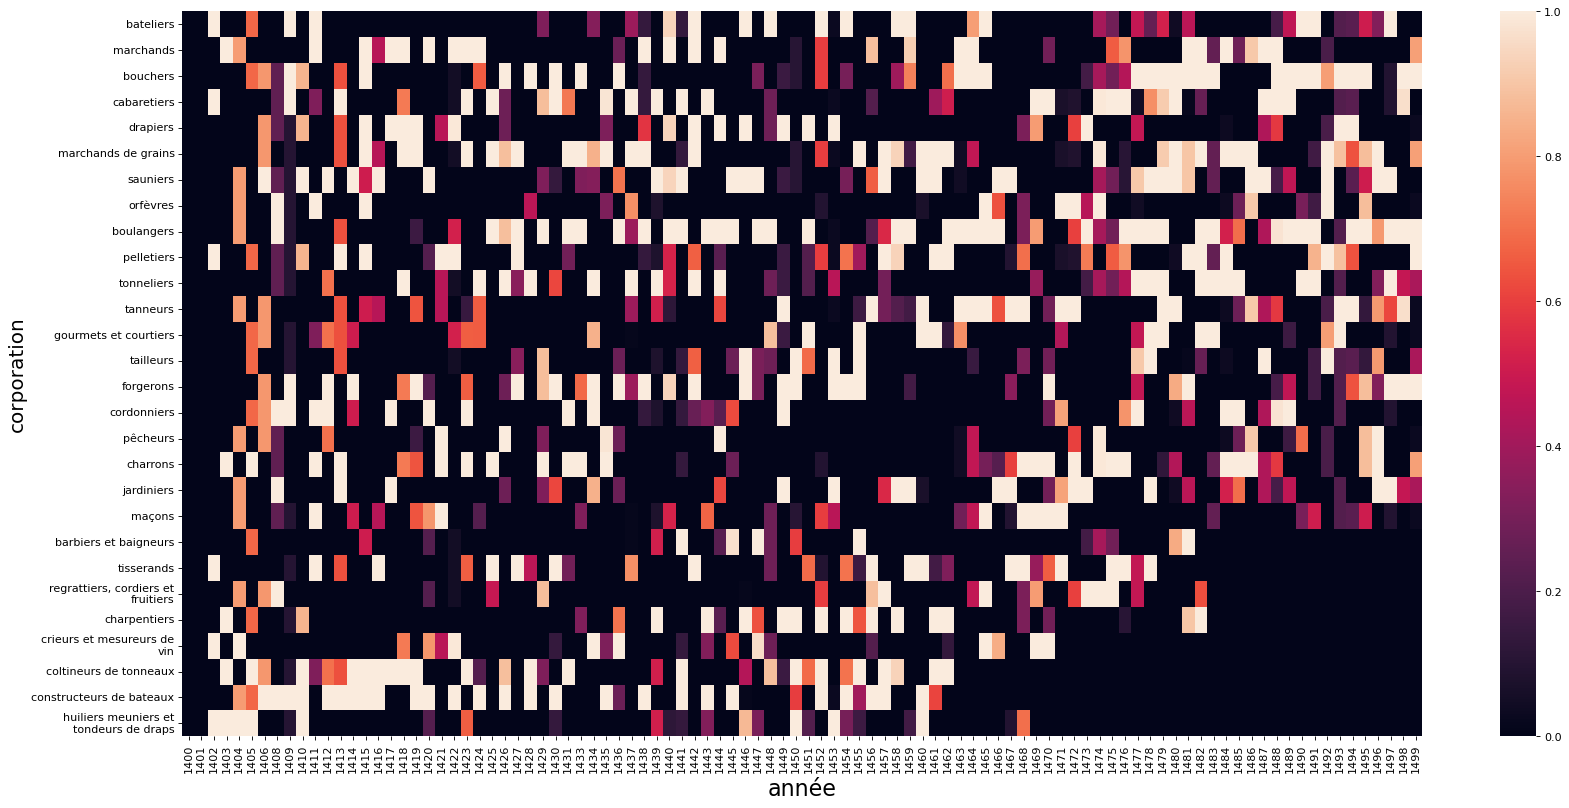

In [13]:
plt.figure(figsize=(25, 12), dpi=80)
heat = sns.heatmap(df_out_norm,  vmin=0, vmax=1)

#heat.set_title("Carte de chaleur du pourvoiement des mandats de représentant au conseil par corporation (1400-1499)", loc='center')
heat.set_xlabel("année", fontsize = 20)
heat.set_ylabel("corporation", fontsize = 18)
wrap_labels(heat, 25)
fig = heat.get_figure()
#fig.savefig('./Images/heatmapXV.svg', format='svg',bbox_inches='tight')

<Figure size 800x560 with 0 Axes>

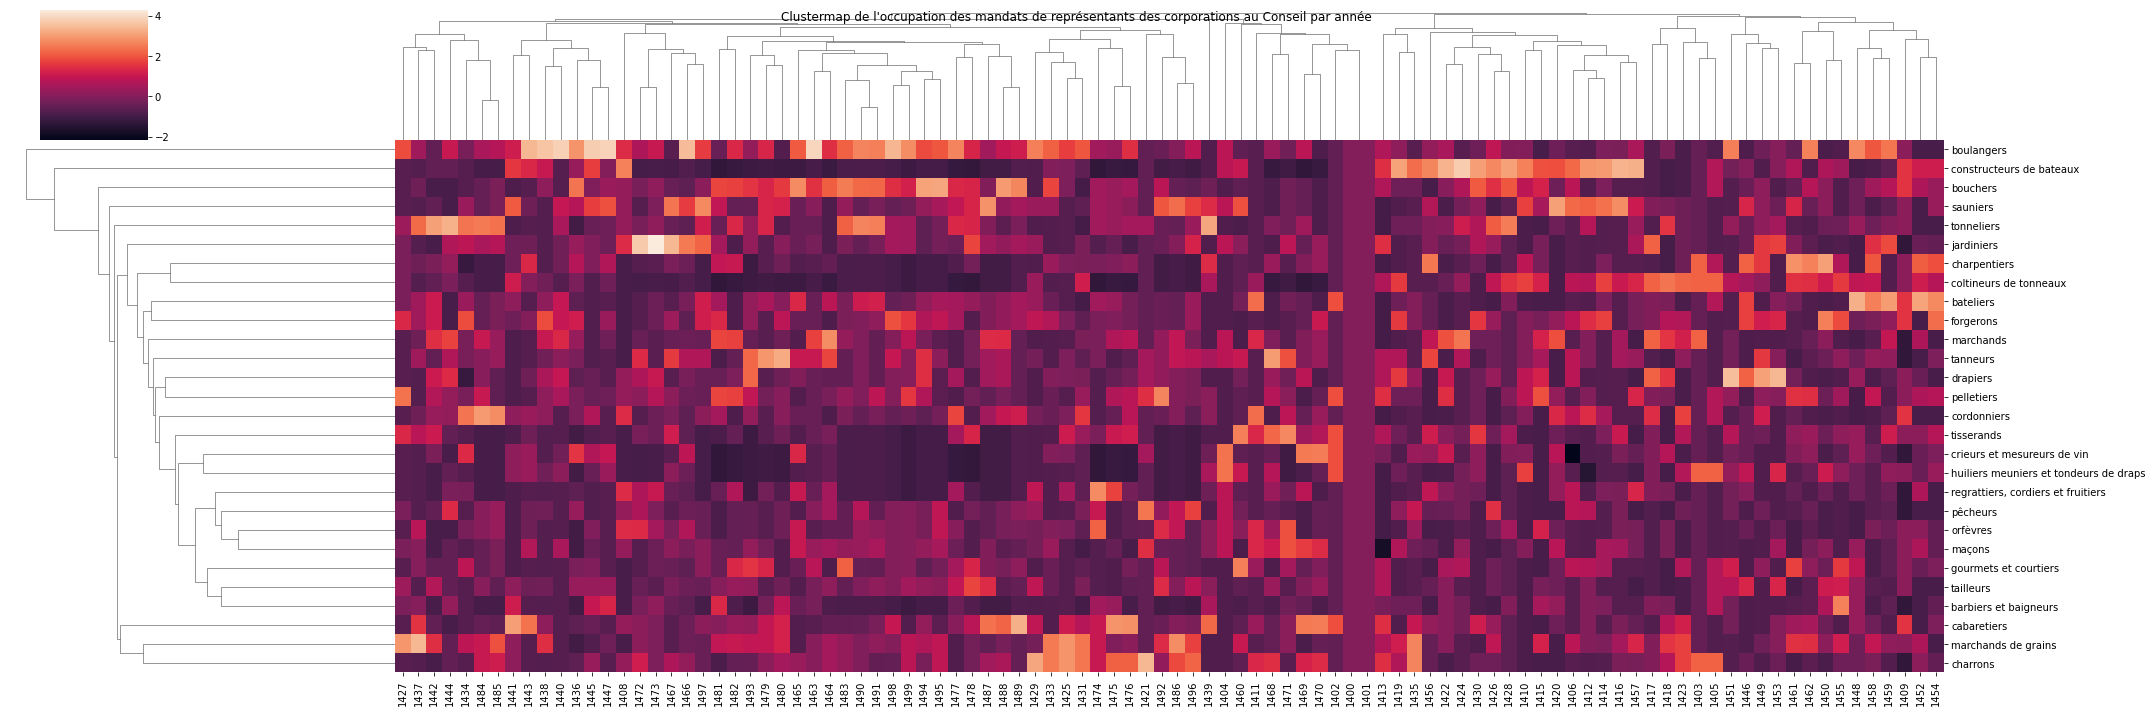

In [14]:
#df_out_norm = df_out_norm.round(decimals=4)
plt.figure(figsize=(10, 7), dpi=80) 

clustermap = sns.clustermap(df_out_norm, figsize=(30, 10)).fig.suptitle("Clustermap de l'occupation des mandats de représentants des corporations au Conseil par année")
plt.show()
fig = clustermap.get_figure()
fig.savefig('./Images/ClustermapXV.svg', format='svg',bbox_inches='tight')

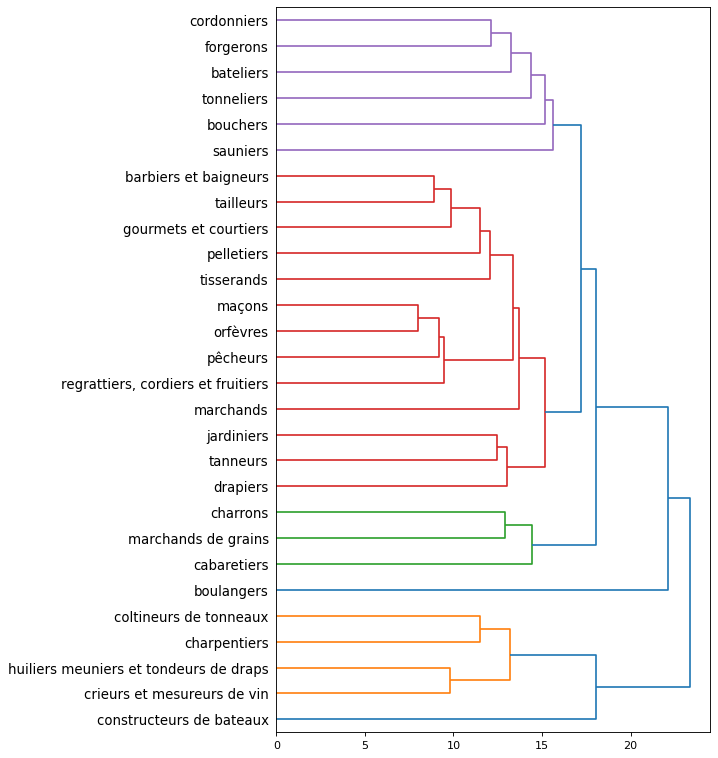

In [15]:
Z = linkage(df_out_norm, 'ward')
plt.figure(figsize=(7, 12), dpi=80)
#plt.title("Dendrogramme de classification des corporations\npar leur profil d'occupation des mandats", fontsize="15")
dend = dendrogram(Z, leaf_font_size=12, labels=df_out_norm.index, orientation = 'right')
plt.savefig('./Images/dend_XV.svg', format='svg',bbox_inches='tight')

In [16]:
colors = palettes.met_brew(name="Hokusai1", n=28, brew_type="continuous")

In [17]:
tidy_df = df_out_norm.transpose()
df3 = tidy_df.stack().reset_index(level=0, drop=True).reset_index()
df3.columns = ['column name', 'value']
df3.sort_values(['column name', 'value'], inplace=True)
df3['mean'] = df3.mean(axis=1)
df3 = df3.sort_values(by=['mean'])
df3.drop(['mean'], axis=1)

/tmp/ipykernel_13073/2187136815.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df3['mean'] = df3.mean(axis=1)


,column name,value
192,crieurs et mesureurs de vin,-2.151942
355,maçons,-1.792776
335,huiliers meuniers et tondeurs de draps,-1.480145
2041,coltineurs de tonneaux,-1.321908
2042,constructeurs de bateaux,-1.321908
...,...,...
1212,boulangers,3.757428
1072,boulangers,3.816931
1268,boulangers,3.874710
1716,boulangers,3.915224


/tmp/ipykernel_13073/2215107470.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df2['mean'] = df2.mean(axis=1)
/home/hippolyte/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self._figure.tight_layout(*args, **kwargs)
/home/hippolyte/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self._figure.tight_layout(*args, **kwargs)


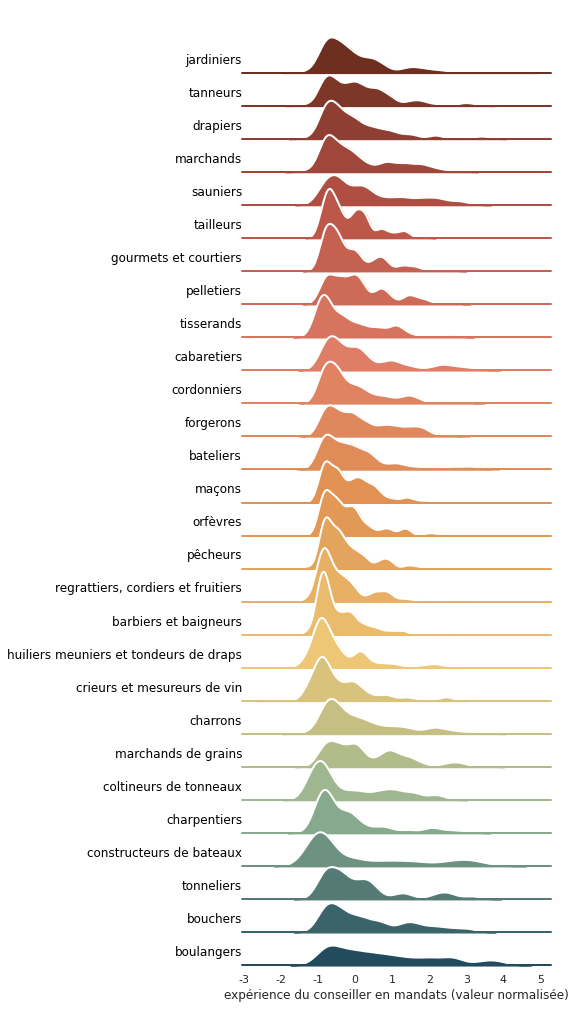

In [23]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

tidy_df = df_out_notnorm.transpose()
df2 = tidy_df.stack().reset_index(level=0, drop=True).reset_index()
df2.columns = ['column name', 'value']
df2.sort_values(['column name', 'value'], inplace=True)
df2['mean'] = df2.mean(axis=1)
df2 = df2.sort_values(by=['mean'])
df2.drop(['mean'], axis=1)

pal = sns.cubehelix_palette(28, start=1, rot=-.25, light=.7)
g = sns.FacetGrid(df3, row="column name", hue="column name", aspect=10, height=.5, palette=colors,
                 row_order = ['jardiniers', 'tanneurs', 'drapiers', 'marchands', 'sauniers', 'tailleurs', 'gourmets et courtiers', 
                'pelletiers', 'tisserands', 'cabaretiers', 'cordonniers', 'forgerons', 'bateliers', 'maçons', 
                'orfèvres', 'pêcheurs', 'regrattiers, cordiers et fruitiers', 'barbiers et baigneurs', 
                'huiliers meuniers et tondeurs de draps', 'crieurs et mesureurs de vin', 'charrons', 
                'marchands de grains', 'coltineurs de tonneaux', 'charpentiers', 'constructeurs de bateaux', 
                'tonneliers', 'bouchers', 'boulangers'], hue_order = ['jardiniers', 'tanneurs', 'drapiers', 'marchands', 'sauniers', 'tailleurs', 'gourmets et courtiers', 
                'pelletiers', 'tisserands', 'cabaretiers', 'cordonniers', 'forgerons', 'bateliers', 'maçons', 
                'orfèvres', 'pêcheurs', 'regrattiers, cordiers et fruitiers', 'barbiers et baigneurs', 
                'huiliers meuniers et tondeurs de draps', 'crieurs et mesureurs de vin', 'charrons', 
                'marchands de grains', 'coltineurs de tonneaux', 'charpentiers', 'constructeurs de bateaux', 
                'tonneliers', 'bouchers', 'boulangers'])

g.map(sns.kdeplot, "value",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "value", clip_on=False, color="w", lw=2, bw_adjust=.5)

g.map(plt.axhline, y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, color='black',
            ha="right", va="center", transform=ax.transAxes)


g.map(label, "value")

g.figure.subplots_adjust(hspace=-.50)

g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)
plt.xlabel('expérience du conseiller en mandats (valeur normalisée)')
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x)))
plt.savefig('./Images/kde_xv.svg', format='svg',bbox_inches='tight')

In [15]:
df2['val'] = 'non normalisé'
df3['val'] = 'normalisé'

In [16]:
df_final = pd.concat([df2, df3])
df_final.sort_values(['column name', 'value'], inplace=True)

In [17]:
df_final

,column name,value,mean,val
2288,barbiers et baigneurs,0.0,0.0,non normalisé
2708,barbiers et baigneurs,0.0,0.0,non normalisé
2736,barbiers et baigneurs,0.0,0.0,non normalisé
2344,barbiers et baigneurs,0.0,0.0,non normalisé
2372,barbiers et baigneurs,0.0,0.0,non normalisé
...,...,...,...,...
906,tonneliers,8.0,8.0,non normalisé
990,tonneliers,9.0,9.0,non normalisé
1046,tonneliers,10.0,10.0,non normalisé
1130,tonneliers,11.0,11.0,non normalisé


/home/hippolyte/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self._figure.tight_layout(*args, **kwargs)
/home/hippolyte/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self._figure.tight_layout(*args, **kwargs)


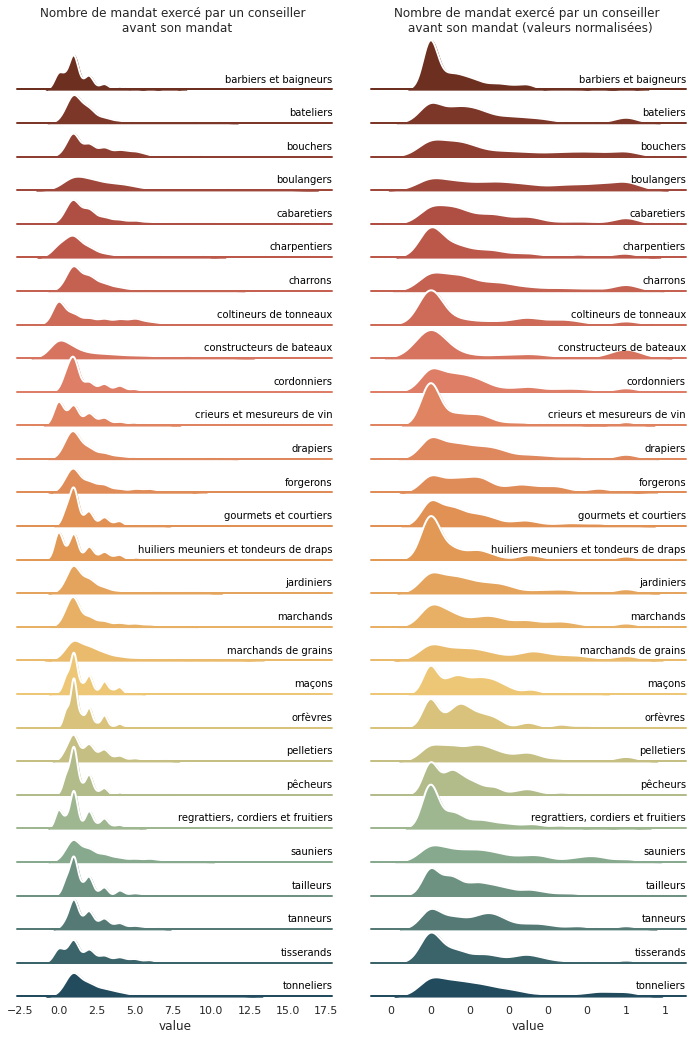

In [18]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

pal = sns.cubehelix_palette(28, start=1, rot=-.25, light=.7)
g = sns.FacetGrid(df_final, row="column name", col="val",hue="column name", aspect=10, height=.5, palette=colors, sharex='col', sharey='col')

g.map(sns.kdeplot, "value",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "value", clip_on=False, color="w", lw=2, bw_adjust=.5)

g.map(plt.axhline, y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


def label(x, color, label):
    ax = plt.gca()
    ax.text(1, .2, label, fontsize= 10, color='black',
            ha="right", va="center",transform=ax.transAxes)


g.map(label, "value")

g.figure.subplots_adjust(hspace=-.35)

g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x)))

axes = g.axes.flatten()
axes[0].set_title("Nombre de mandat exercé par un conseiller \n avant son mandat")
axes[1].set_title("Nombre de mandat exercé par un conseiller \n avant son mandat (valeurs normalisées)")


plt.show()